# <span style="color: hotpink">Project 1: Classification
### <span style="color: hotpink">Fabiola Rojas</span>
---

### <span style="color: hotpink">The Problem</span> 
Family planning plays a crucial role in public health and economic stability, yet contraceptive use varies significantly based on demographic and socioeconomic factors. Understanding what influences contraceptive choices can help policymakers and healthcare providers develop better strategies for reproductive health education and access.

I aim to build a classification model that predicts a woman's contraceptive method choice based on various factors such as education, employment status, and standard of living. I will use the following questions to help uncover insights about the dataset: 

- What is the most common contraceptive method?
- How are the socioeconomic features distributed?
- Does a husband's education and occupation affect their wife's contraceptive method choice?
- What are the differences in contraceptive methods based on demographics and socioeconomic factors?
- What combinations of factors are most likely to lead to certain choice of contraceptive method? (For example, low education and low standard of living.)

The insights gained from this analysis could help improve family planning policies by identifying key socioeconomic barriers to contraceptive use.

---

### <span style="color: hotpink">The Data</span> 
The dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. It consists of records of married women who were either not pregnant or were unsure of their pregnancy status at the time of the interview. The dataset contains 10 variables that capture demographic and socioeconomic characteristics of the women surveyed, including their age, education level, number of children, religious affiliation, employment status, and exposure to media.

The target variable, contraceptive_method, has three categories: 
- 1 = No-use (The woman does not use any contraceptive method)
- 2 = Long-term method (e.g., IUD, sterilization)
- 3 = Short-term method (e.g., pill, condom, injection)
  
The categorical variables have already been encoded as numerical values, making it easier for machine learning models to process. A key aspect of this project will be understanding the relationships between these features and contraceptive choices through data visualization and classification modeling.

---

<span style="color: hotpink">The dataset is not available as a csv or spreadsheet, so I will have to fetch it directly from the UCI repository.

In [5]:
#pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset from UC Irvine Machine Learning Repository
contraceptive_method_choice = fetch_ucirepo(id=30) 
  
# data as pandas dataframes 
X = contraceptive_method_choice.data.features 
y = contraceptive_method_choice.data.targets 


<span style="color: hotpink">Now I can work with it as a pandas dataframe.

In [8]:
import pandas as pd

df = pd.concat([X, y], axis=1)

df.head()

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [9]:
df.shape

(1473, 10)

In [10]:
df.columns

Index(['wife_age', 'wife_edu', 'husband_edu', 'num_children', 'wife_religion',
       'wife_working', 'husband_occupation', 'standard_of_living_index',
       'media_exposure', 'contraceptive_method'],
      dtype='object')

<span style="color: hotpink">I'm going ahead and creating lists storing the categorical and numerical columns separately for when I visualize them later on.

In [12]:
cat_cols = ['wife_edu', 'husband_edu', 'wife_religion', 'wife_working', 
            'husband_occupation', 'standard_of_living_index', 'media_exposure',  
            'contraceptive_method']

num_cols = ['wife_age', 'num_children']

<span style="color: hotpink">The dataset information on the UCI site says there are no missing values but I am going to check just in case. I'll also confirm that the data types are all integers, and that the categorical columns only contain the expected values (0-4).

In [14]:
df.isnull().sum()

wife_age                    0
wife_edu                    0
husband_edu                 0
num_children                0
wife_religion               0
wife_working                0
husband_occupation          0
standard_of_living_index    0
media_exposure              0
contraceptive_method        0
dtype: int64

In [15]:
df.dtypes

wife_age                    int64
wife_edu                    int64
husband_edu                 int64
num_children                int64
wife_religion               int64
wife_working                int64
husband_occupation          int64
standard_of_living_index    int64
media_exposure              int64
contraceptive_method        int64
dtype: object

In [16]:
for col in cat_cols:
    print(df[col].value_counts())
    print()

wife_edu
4    577
3    410
2    334
1    152
Name: count, dtype: int64

husband_edu
4    899
3    352
2    178
1     44
Name: count, dtype: int64

wife_religion
1    1253
0     220
Name: count, dtype: int64

wife_working
1    1104
0     369
Name: count, dtype: int64

husband_occupation
3    585
1    436
2    425
4     27
Name: count, dtype: int64

standard_of_living_index
4    684
3    431
2    229
1    129
Name: count, dtype: int64

media_exposure
0    1364
1     109
Name: count, dtype: int64

contraceptive_method
1    629
3    511
2    333
Name: count, dtype: int64



<span style="color: hotpink">Everything looks good so I won't be needing to do any more preprocessing. Here are the definitions of the class values for each of the categorical columns. (The values for husband's occupation are not explicitly defined in the dataset information.)

| Class Value       | Wife's Education | Husband's Education | Wife's Religion | Wife Working | Husband's Occupation | Standard of Living Index | Media Exposure | Contraceptive Method Used |
|------------------|-----------------|------------------|--------------|-------------|------------------|----------------------|--------------|------------------------|
| **0**            |                 |                  | Non-Islam    | Yes         |                  |                      | Good         |                        |
| **1**            | Low             | Low              | Islam        | No          | Category 1       | Low                  | Not good     | No-use                 |
| **2**            |                 |                  |              |             | Category 2       |                      |              | Long-term              |
| **3**            |                 |                  |              |             | Category 3       |                      |              | Short-term             |
| **4**            | High            | High             |              |             | Category 4       | High                 |              |                        |


## <span style="color: hotpink">Data Understanding/Visualization

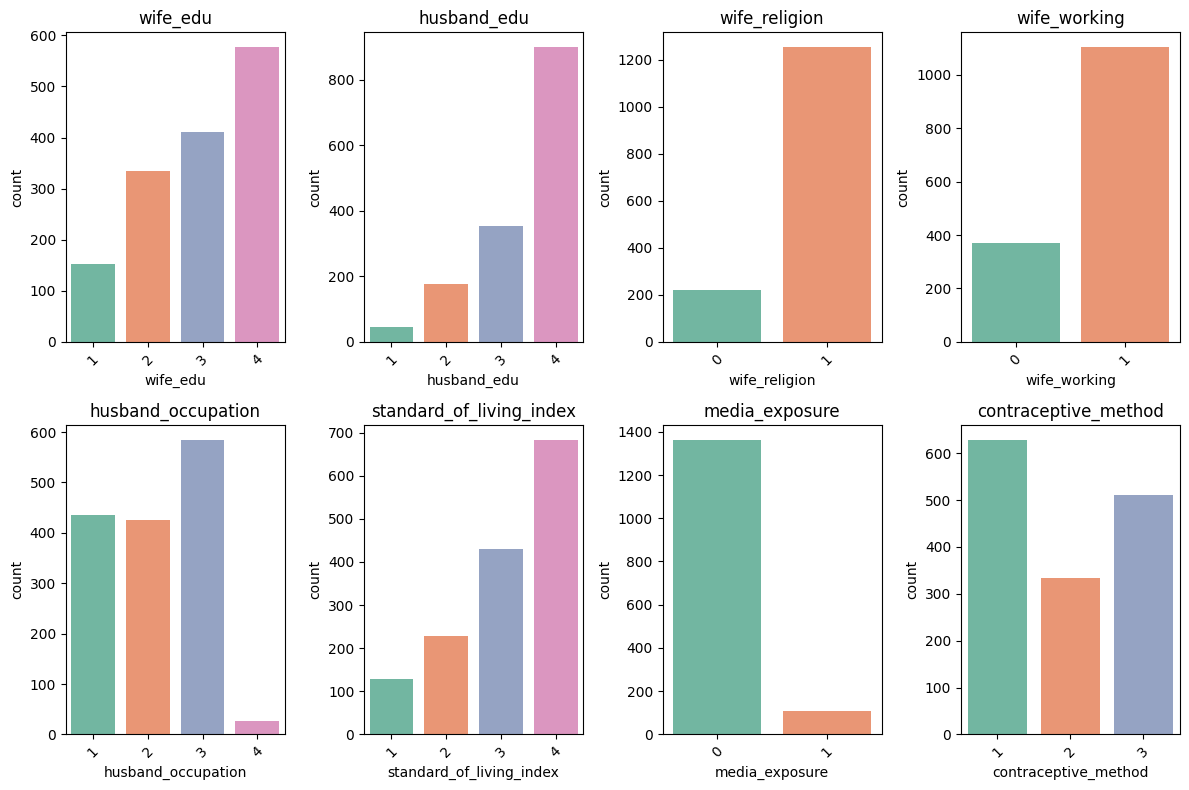

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 4, figsize=(12, 8))

for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(x=df[col], ax=ax, hue=df[col], palette="Set2", dodge=False)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45) 
    if ax.get_legend() is not None:
        ax.get_legend().remove()

plt.tight_layout()
plt.show()


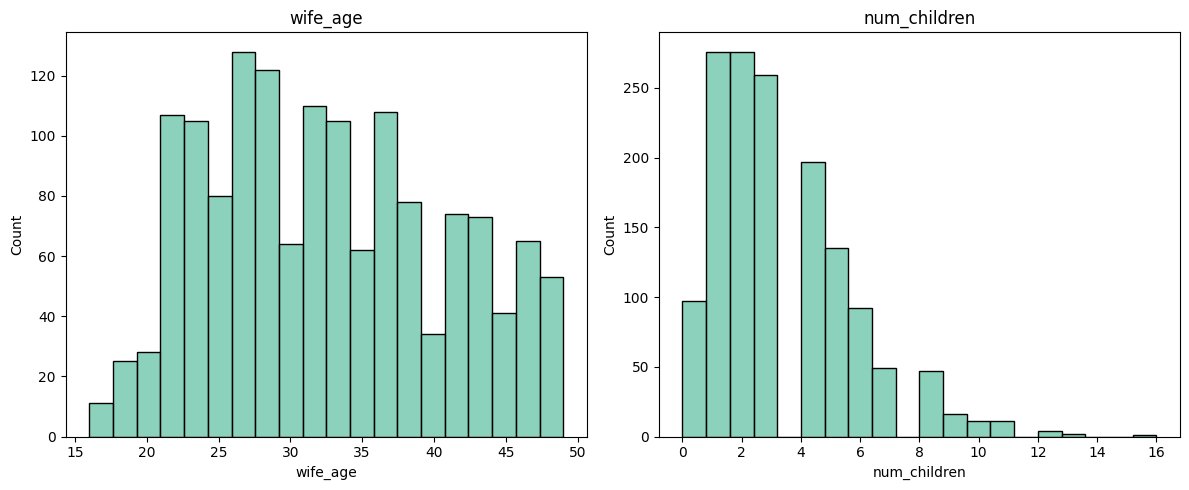

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):  
    sns.histplot(df[col], ax=axes[i], bins=20, color='#66c2a5')
    axes[i].set_title(col)

for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## <span style="color: hotpink">Modeling

need to ensure models don't treat ordinal categories as numeric values  
naive bayes -> CategoricalNB  
knn and svm rely on distance calculations  
no more encoding necessary, think about scaling